<a href="https://colab.research.google.com/github/Alisya0910/SkripsiAlisya/blob/Final/DataPreprocessingPrabowo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proses Data Preprocessing**

1.   Cleaning Data (membersihkan data
twitter dari mention, url, dll)
2. Casefolding (mengubah huruf kapital menjadi huruf kecil)
3.  Stemming (mengubah kata menjadi kata dasarnya)
4. Filtering (menghapus stopword dan tokenize)
5. TF - IDF

In [1]:
#mengimport library  yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re

menampilkan data asli

In [2]:
Data = pd.read_excel('PrabowoPresidentTweets.xlsx')

Data

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Tue Nov 07 03:56:09 +0000 2023,1721740000000000000,@Guard31Tony @adri_7i @AlmaghribiS @BANGSAygSU...,0,0,0,3,in,1152450000000000000,1721680000000000000,are_inismyname,https://twitter.com/are_inismyname/status/1721...
1,Tue Nov 07 03:55:16 +0000 2023,1721740000000000000,"Emang Boleh Capres @prabowo Subianto , se GEMO...",0,0,4,10,in,872175000000000000,1721740000000000000,RcyberProj0,https://twitter.com/RcyberProj0/status/1721738...
2,Tue Nov 07 03:46:50 +0000 2023,1721740000000000000,Pak Prabowo jiwa komedinya kadang tak terbendu...,1,0,3,14,in,1576910000000000000,1721740000000000000,dekade_08,https://twitter.com/dekade_08/status/172173593...
3,Tue Nov 07 03:30:00 +0000 2023,1721730000000000000,Nurul Arifin Ungkap Tak Ada Agenda Politik Lai...,0,0,14,6,in,721898000000000000,1721730000000000000,golkarpedia,https://twitter.com/golkarpedia/status/1721731...
4,Tue Nov 07 03:27:37 +0000 2023,1721730000000000000,Momen Prabowo Bertemu Adiknya Ilham Habibie di...,0,0,0,0,in,1603940000000000000,1721730000000000000,dpc_badung,https://twitter.com/dpc_badung/status/17217311...
...,...,...,...,...,...,...,...,...,...,...,...,...
548,Mon Nov 06 08:49:09 +0000 2023,1721450000000000000,#prabowo #PrabowoGibranIstimewa #PrabowoGibran...,0,0,0,0,qme,1719630000000000000,1721450000000000000,Amanda188792120,https://twitter.com/Amanda188792120/status/172...
549,Mon Nov 06 08:49:03 +0000 2023,1721450000000000000,#prabowo #PrabowoGibranIstimewa #PrabowoGibran...,0,0,0,0,qme,1719630000000000000,1721450000000000000,Amanda188792120,https://twitter.com/Amanda188792120/status/172...
550,Mon Nov 06 08:49:01 +0000 2023,1721450000000000000,#prabowo #PrabowoGibranIstimewa #PrabowoGibran...,0,0,0,0,qme,1719630000000000000,1721450000000000000,Amanda188792120,https://twitter.com/Amanda188792120/status/172...
551,Mon Nov 06 08:48:58 +0000 2023,1721450000000000000,#prabowo #PrabowoGibranIstimewa #PrabowoGibran...,0,0,0,0,qme,1719630000000000000,1721450000000000000,Amanda188792120,https://twitter.com/Amanda188792120/status/172...


# 1. **Cleaning Data**
---
Membersihkan data dari mention, url, emoji, dan lainnya


Menampilkan attribut full_text saja karena attribut full_text yang akan di pre-processing

In [3]:
Data = Data[['full_text']]

Data

,full_text
0,@Guard31Tony @adri_7i @AlmaghribiS @BANGSAygSU...
1,"Emang Boleh Capres @prabowo Subianto , se GEMO..."
2,Pak Prabowo jiwa komedinya kadang tak terbendu...
3,Nurul Arifin Ungkap Tak Ada Agenda Politik Lai...
4,Momen Prabowo Bertemu Adiknya Ilham Habibie di...
...,...
548,#prabowo #PrabowoGibranIstimewa #PrabowoGibran...
549,#prabowo #PrabowoGibranIstimewa #PrabowoGibran...
550,#prabowo #PrabowoGibranIstimewa #PrabowoGibran...
551,#prabowo #PrabowoGibranIstimewa #PrabowoGibran...


In [4]:
Data['clean_text'] = Data.loc[:, 'full_text']

<ipython-input-4-3ca4832aec66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['clean_text'] = Data.loc[:, 'full_text']


In [5]:
Data

,full_text,clean_text
0,@Guard31Tony @adri_7i @AlmaghribiS @BANGSAygSU...,@Guard31Tony @adri_7i @AlmaghribiS @BANGSAygSU...
1,"Emang Boleh Capres @prabowo Subianto , se GEMO...","Emang Boleh Capres @prabowo Subianto , se GEMO..."
2,Pak Prabowo jiwa komedinya kadang tak terbendu...,Pak Prabowo jiwa komedinya kadang tak terbendu...
3,Nurul Arifin Ungkap Tak Ada Agenda Politik Lai...,Nurul Arifin Ungkap Tak Ada Agenda Politik Lai...
4,Momen Prabowo Bertemu Adiknya Ilham Habibie di...,Momen Prabowo Bertemu Adiknya Ilham Habibie di...
...,...,...
548,#prabowo #PrabowoGibranIstimewa #PrabowoGibran...,#prabowo #PrabowoGibranIstimewa #PrabowoGibran...
549,#prabowo #PrabowoGibranIstimewa #PrabowoGibran...,#prabowo #PrabowoGibranIstimewa #PrabowoGibran...
550,#prabowo #PrabowoGibranIstimewa #PrabowoGibran...,#prabowo #PrabowoGibranIstimewa #PrabowoGibran...
551,#prabowo #PrabowoGibranIstimewa #PrabowoGibran...,#prabowo #PrabowoGibranIstimewa #PrabowoGibran...


In [6]:
#Text-Cleaning (URLs, Mentions, etc)
#installing tweet-preprocessor
!pip install tweet-preprocessor

In [7]:
import preprocessor as p

In [8]:
def preprocess_tweet(row):
    text = row['clean_text']
    text = p.clean(text)
    return text

Data['clean_text'] = Data.apply(preprocess_tweet, axis=1)

<ipython-input-8-4049b9197ac6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['clean_text'] = Data.apply(preprocess_tweet, axis=1)


In [9]:
Data = Data[Data != '']

In [10]:
Data = Data.dropna()

In [11]:
Data

,full_text,clean_text
0,@Guard31Tony @adri_7i @AlmaghribiS @BANGSAygSU...,Tanyakan pejabat terkait dong kenapa policy ny...
1,"Emang Boleh Capres @prabowo Subianto , se GEMO...","Emang Boleh Capres Subianto , se GEMOY ini.."
2,Pak Prabowo jiwa komedinya kadang tak terbendu...,Pak Prabowo jiwa komedinya kadang tak terbendu...
3,Nurul Arifin Ungkap Tak Ada Agenda Politik Lai...,Nurul Arifin Ungkap Tak Ada Agenda Politik Lai...
4,Momen Prabowo Bertemu Adiknya Ilham Habibie di...,Momen Prabowo Bertemu Adiknya Ilham Habibie di...
...,...,...
527,Gimana luur mantab kan .... #PrabowoGibran2024,Gimana luur mantab kan ....
528,TKN Prabowo - Gibran diumumkan hari ini. #Pr...,TKN Prabowo - Gibran diumumkan hari ini.
529,@adearmando61 Amin itu pasti #PrabowoGibran2024,Amin itu pasti
530,"Viral Nih!!! Satu pesan singkat, padat dan dal...","Viral Nih!!! Satu pesan singkat, padat dan dal..."


#2. **Casefolding**
---
menghapus tanda baca, extra whitespace dan mengubah huruf besar manjadi huruf kecil


In [12]:
#menghapus extra white space, punctuation, dan menlowercase kan
Data['clean_text'] = Data['clean_text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ').str.replace('\d+', '')

<ipython-input-12-be7208876281>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Data['clean_text'] = Data['clean_text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ').str.replace('\d+', '')


In [13]:
Data

,full_text,clean_text
0,@Guard31Tony @adri_7i @AlmaghribiS @BANGSAygSU...,tanyakan pejabat terkait dong kenapa policy ny...
1,"Emang Boleh Capres @prabowo Subianto , se GEMO...",emang boleh capres subianto se gemoy ini
2,Pak Prabowo jiwa komedinya kadang tak terbendu...,pak prabowo jiwa komedinya kadang tak terbendu...
3,Nurul Arifin Ungkap Tak Ada Agenda Politik Lai...,nurul arifin ungkap tak ada agenda politik lai...
4,Momen Prabowo Bertemu Adiknya Ilham Habibie di...,momen prabowo bertemu adiknya ilham habibie di...
...,...,...
527,Gimana luur mantab kan .... #PrabowoGibran2024,gimana luur mantab kan
528,TKN Prabowo - Gibran diumumkan hari ini. #Pr...,tkn prabowo gibran diumumkan hari ini
529,@adearmando61 Amin itu pasti #PrabowoGibran2024,amin itu pasti
530,"Viral Nih!!! Satu pesan singkat, padat dan dal...",viral nih satu pesan singkat padat dan dalam d...


#3. **Stemming**

---
https://ksnugroho.medium.com/dasar-text-preprocessing-dengan-python-*a4fa52608ffe*


In [14]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00


In [15]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pandas as pd

# Membuat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Membuat DataFrame contoh
Data['stemword'] = pd.DataFrame(Data['clean_text'])


# Mendefinisikan fungsi stemming
def stemming(text):
    return stemmer.stem(text)

# Menerapkan fungsi stemming ke kolom 'TextColumn'
Data['stemword'] = Data['clean_text'].apply(str).apply(stemming)

# Menampilkan DataFrame hasil


In [16]:
Data

,full_text,clean_text,stemword
0,@Guard31Tony @adri_7i @AlmaghribiS @BANGSAygSU...,tanyakan pejabat terkait dong kenapa policy ny...,tanya jabat kait dong kenapa policy nya lama k...
1,"Emang Boleh Capres @prabowo Subianto , se GEMO...",emang boleh capres subianto se gemoy ini,emang boleh capres subianto se gemoy ini
2,Pak Prabowo jiwa komedinya kadang tak terbendu...,pak prabowo jiwa komedinya kadang tak terbendu...,pak prabowo jiwa komedi kadang tak bendung pas...
3,Nurul Arifin Ungkap Tak Ada Agenda Politik Lai...,nurul arifin ungkap tak ada agenda politik lai...,nurul arifin ungkap tak ada agenda politik lai...
4,Momen Prabowo Bertemu Adiknya Ilham Habibie di...,momen prabowo bertemu adiknya ilham habibie di...,momen prabowo temu adik ilham habibie di acara...
...,...,...,...
527,Gimana luur mantab kan .... #PrabowoGibran2024,gimana luur mantab kan,gimana luur mantab kan
528,TKN Prabowo - Gibran diumumkan hari ini. #Pr...,tkn prabowo gibran diumumkan hari ini,tkn prabowo gibran umum hari ini
529,@adearmando61 Amin itu pasti #PrabowoGibran2024,amin itu pasti,amin itu pasti
530,"Viral Nih!!! Satu pesan singkat, padat dan dal...",viral nih satu pesan singkat padat dan dalam d...,viral nih satu pesan singkat padat dan dalam d...


In [17]:
Data[['clean_text','stemword']]

,clean_text,stemword
0,tanyakan pejabat terkait dong kenapa policy ny...,tanya jabat kait dong kenapa policy nya lama k...
1,emang boleh capres subianto se gemoy ini,emang boleh capres subianto se gemoy ini
2,pak prabowo jiwa komedinya kadang tak terbendu...,pak prabowo jiwa komedi kadang tak bendung pas...
3,nurul arifin ungkap tak ada agenda politik lai...,nurul arifin ungkap tak ada agenda politik lai...
4,momen prabowo bertemu adiknya ilham habibie di...,momen prabowo temu adik ilham habibie di acara...
...,...,...
527,gimana luur mantab kan,gimana luur mantab kan
528,tkn prabowo gibran diumumkan hari ini,tkn prabowo gibran umum hari ini
529,amin itu pasti,amin itu pasti
530,viral nih satu pesan singkat padat dan dalam d...,viral nih satu pesan singkat padat dan dalam d...


#4. **Filtering (Penghapusan stopword & Tokenizing)**


---
tokenize memenggal kalimat menjadi perkata, Penghapusan stopword berfungsi untuk menghilangkan kata yang tidak memiliki nilai sentimen atau kata dasar seperti kata yang, dan, di, dari, dan lain sebagainya.



In [18]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Download kumpulan stopword untuk bahasa Indonesia
nltk.download('punkt')
nltk.download('stopwords')

# Contoh DataFrame
Data['stemword'] = pd.DataFrame(Data['stemword'])

# Fungsi untuk melakukan tokenisasi dan penghapusan stopword
def tokenize_and_remove_stopwords(text):
    # Tokenisasi kata-kata
    words = word_tokenize(text)

    # Mengambil stopword bahasa Indonesia
    stop_words = set(stopwords.words('indonesian'))

    # Menghapus stopword dari kata-kata
    filtered_words = [word for word in words if word.lower() not in stop_words]

    return filtered_words

# Tokenisasi dan penghapusan stopword pada setiap elemen dalam kolom 'Text'
Data['Tokenized_and_No_Stopwords'] = Data['stemword'].apply(tokenize_and_remove_stopwords)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
Data

,full_text,clean_text,stemword,Tokenized_and_No_Stopwords
0,@Guard31Tony @adri_7i @AlmaghribiS @BANGSAygSU...,tanyakan pejabat terkait dong kenapa policy ny...,tanya jabat kait dong kenapa policy nya lama k...,"[jabat, kait, policy, nya, klo, urus, geopolit..."
1,"Emang Boleh Capres @prabowo Subianto , se GEMO...",emang boleh capres subianto se gemoy ini,emang boleh capres subianto se gemoy ini,"[emang, capres, subianto, gemoy]"
2,Pak Prabowo jiwa komedinya kadang tak terbendu...,pak prabowo jiwa komedinya kadang tak terbendu...,pak prabowo jiwa komedi kadang tak bendung pas...,"[prabowo, jiwa, komedi, kadang, bendung, pas, ..."
3,Nurul Arifin Ungkap Tak Ada Agenda Politik Lai...,nurul arifin ungkap tak ada agenda politik lai...,nurul arifin ungkap tak ada agenda politik lai...,"[nurul, arifin, agenda, politik, acara, puncak..."
4,Momen Prabowo Bertemu Adiknya Ilham Habibie di...,momen prabowo bertemu adiknya ilham habibie di...,momen prabowo temu adik ilham habibie di acara...,"[momen, prabowo, temu, adik, ilham, habibie, a..."
...,...,...,...,...
527,Gimana luur mantab kan .... #PrabowoGibran2024,gimana luur mantab kan,gimana luur mantab kan,"[gimana, luur, mantab]"
528,TKN Prabowo - Gibran diumumkan hari ini. #Pr...,tkn prabowo gibran diumumkan hari ini,tkn prabowo gibran umum hari ini,"[tkn, prabowo, gibran]"
529,@adearmando61 Amin itu pasti #PrabowoGibran2024,amin itu pasti,amin itu pasti,[amin]
530,"Viral Nih!!! Satu pesan singkat, padat dan dal...",viral nih satu pesan singkat padat dan dalam d...,viral nih satu pesan singkat padat dan dalam d...,"[viral, nih, pesan, singkat, padat, gibran, ti..."


In [20]:
Data[['stemword','Tokenized_and_No_Stopwords']]

,stemword,Tokenized_and_No_Stopwords
0,tanya jabat kait dong kenapa policy nya lama k...,"[jabat, kait, policy, nya, klo, urus, geopolit..."
1,emang boleh capres subianto se gemoy ini,"[emang, capres, subianto, gemoy]"
2,pak prabowo jiwa komedi kadang tak bendung pas...,"[prabowo, jiwa, komedi, kadang, bendung, pas, ..."
3,nurul arifin ungkap tak ada agenda politik lai...,"[nurul, arifin, agenda, politik, acara, puncak..."
4,momen prabowo temu adik ilham habibie di acara...,"[momen, prabowo, temu, adik, ilham, habibie, a..."
...,...,...
527,gimana luur mantab kan,"[gimana, luur, mantab]"
528,tkn prabowo gibran umum hari ini,"[tkn, prabowo, gibran]"
529,amin itu pasti,[amin]
530,viral nih satu pesan singkat padat dan dalam d...,"[viral, nih, pesan, singkat, padat, gibran, ti..."


# 5. **Data Labeling**

---
Melabelkan sentimen analisis data


membuat variable anies_sentimen untuk menampung data yang perlu di labelkan

In [21]:
!pip install transformers

In [22]:
from transformers import pipeline
import pandas as pd

# Inisialisasi model BERT untuk analisis sentimen
classifier = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# Fungsi untuk prediksi sentimen pada teks
def predict_sentiment(text):
    result = classifier(text)[0]
    sentiment_label = result['label']
    sentiment_score = result['score']
    return sentiment_label, sentiment_score

# Prediksi sentimen untuk setiap teks dalam series
sentiment_predictions = Data['clean_text'].apply(predict_sentiment)

# Menyatukan hasil prediksi dengan dataset
result_df = pd.DataFrame(list(sentiment_predictions), columns=['Sentimen_Label', 'Sentimen_Score'])
final_result = pd.concat([Data['clean_text'], result_df], axis=1)

print(final_result)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

                                            clean_text Sentimen_Label  \
0    tanyakan pejabat terkait dong kenapa policy ny...        2 stars   
1            emang boleh capres subianto se gemoy ini          1 star   
2    pak prabowo jiwa komedinya kadang tak terbendu...        3 stars   
3    nurul arifin ungkap tak ada agenda politik lai...         1 star   
4    momen prabowo bertemu adiknya ilham habibie di...        4 stars   
..                                                 ...            ...   
445                                                NaN         1 star   
449                                                NaN         1 star   
493                                                NaN         1 star   
498                                                NaN         1 star   
499                                                NaN         1 star   

     Sentimen_Score  
0          0.307990  
1          0.508866  
2          0.292454  
3          0.447485  
4          0.

In [23]:
no_nan = final_result.dropna()

In [24]:
import pandas as pd

def Sentiment_startovalue(label):
    if label in ["1 star", "2 stars"]:
        return 'Negative'
    elif label == "3 stars":
        return 'Neutral'
    elif label in ["4 stars", "5 stars"]:
        return 'Positive'
    else:
        return 'Unknown'

# Apply the function to the entire 'Sentimen_Label' column
Data['Sentimen_value'] = no_nan['Sentimen_Label'].apply(Sentiment_startovalue)

In [25]:
Data['Labeling'] = result_df['Sentimen_Label']
Data['Sentimen_score'] = result_df['Sentimen_Score']

In [26]:
Data = Data[['clean_text','Sentimen_value','Labeling','Sentimen_score']].dropna()

In [27]:
senti_Prabowo = Data[['clean_text','Sentimen_value']]

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
senti_Prabowo['label'] = label_encoder.fit_transform(senti_Prabowo['Sentimen_value'])

<ipython-input-27-f27ca7085b5f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti_Prabowo['label'] = label_encoder.fit_transform(senti_Prabowo['Sentimen_value'])


In [28]:
senti_Prabowo

,clean_text,Sentimen_value,label
0,tanyakan pejabat terkait dong kenapa policy ny...,Negative,0
1,emang boleh capres subianto se gemoy ini,Negative,0
2,pak prabowo jiwa komedinya kadang tak terbendu...,Neutral,1
3,nurul arifin ungkap tak ada agenda politik lai...,Negative,0
4,momen prabowo bertemu adiknya ilham habibie di...,Positive,2
...,...,...,...
511,khofifah tak masuk tkn prabowo gibran rosan tu...,Neutral,1
512,setelah putusan mk dan pendaftaran pasangan ca...,Positive,2
513,ini deretan tokoh yang disebut masuk tim kampa...,Positive,2
514,prabowo gibran indonesia maju prabowo gibran i...,Negative,0


In [38]:
senti_Prabowo['Sentimen_value'].value_counts()

Positive    229
Negative    200
Neutral      71
Name: Sentimen_value, dtype: int64

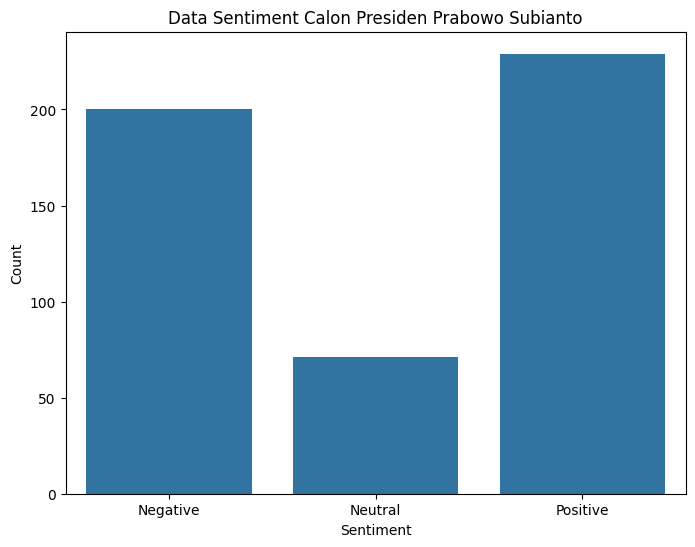

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each sentiment
sentiment_counts = dict(zip(*np.unique(senti_Prabowo['Sentimen_value'], return_counts=True)))

# Bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=list(sentiment_counts.keys()), y=list(sentiment_counts.values()))
plt.title('Data Sentiment Calon Presiden Prabowo Subianto')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.show()

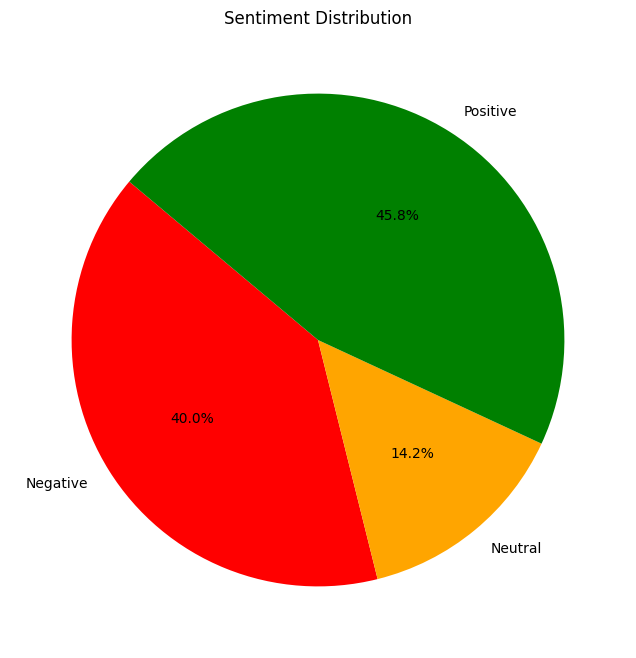

In [54]:
# Count the occurrences of each sentiment
sentiments = senti_Prabowo['Sentimen_value'].value_counts()

# Create a pie chart
labels = sentiment_counts.keys()
sizes = sentiment_counts.values()

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['red', 'orange', 'green'])
plt.title('Sentiment Distribution')
plt.show()

# 6. **Data Split**

---


In [40]:
from sklearn.model_selection import train_test_split

# Misalnya, X adalah fitur dan y adalah label
X_train, X_test, y_train, y_test = train_test_split(senti_Prabowo['clean_text'],senti_Prabowo['label'], test_size=0.2, random_state=42)


In [41]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# 7. **Analisis Menggunakan Naive Bayes**

In [42]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vectorized, y_train)

MultinomialNB()

In [43]:
# Predictions on the test set
predictions = naive_bayes.predict(X_test_vectorized)

# Evaluate the model
accuracy_NB = accuracy_score(y_test, predictions)
print(f'Accuracy of Naive Bayes Multinomial classifier on test set: {accuracy_NB:.2f}')

# Classification report
print('\nClassification Report:\n', classification_report(y_test, predictions))

# Confusion matrix
conf_matrix_NB = confusion_matrix(y_test, predictions)
print('\nConfusion Matrix:\n', conf_matrix_NB)


Accuracy of Naive Bayes Multinomial classifier on test set: 0.44

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.42      0.37        33
           1       0.50      0.14      0.22        14
           2       0.52      0.53      0.52        53

    accuracy                           0.44       100
   macro avg       0.45      0.37      0.37       100
weighted avg       0.45      0.44      0.43       100


Confusion Matrix:
 [[14  0 19]
 [ 5  2  7]
 [23  2 28]]


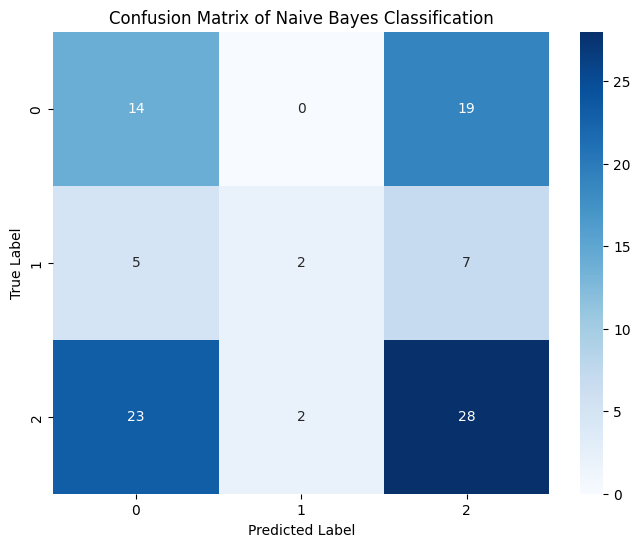

In [44]:
# Example: Confusion Matrix Heatmap
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_NB, annot=True, fmt='d', cmap='Blues', xticklabels=naive_bayes.classes_, yticklabels=naive_bayes.classes_)
plt.title('Confusion Matrix of Naive Bayes Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# 8. **Analisis Menggunakan Regresi Logistik**


In [45]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_vectorized, y_train)

LogisticRegression()

In [46]:
# Prediksi pada set pengujian
predictions = logistic_regression.predict(X_test_vectorized)

# Evaluasi model
accuracy_RL = accuracy_score(y_test, predictions)
print(f'Akurasi: {accuracy_RL:.2f}')

# Laporan klasifikasi
print('\nLaporan Klasifikasi:\n', classification_report(y_test, predictions))

# Matriks kebingungan
conf_matrix_LR = confusion_matrix(y_test, predictions)
print('\nMatriks Kebingungan:\n', conf_matrix_LR)

Akurasi: 0.41

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.33      0.45      0.38        33
           1       0.50      0.07      0.12        14
           2       0.47      0.47      0.47        53

    accuracy                           0.41       100
   macro avg       0.44      0.33      0.33       100
weighted avg       0.43      0.41      0.39       100


Matriks Kebingungan:
 [[15  0 18]
 [ 3  1 10]
 [27  1 25]]


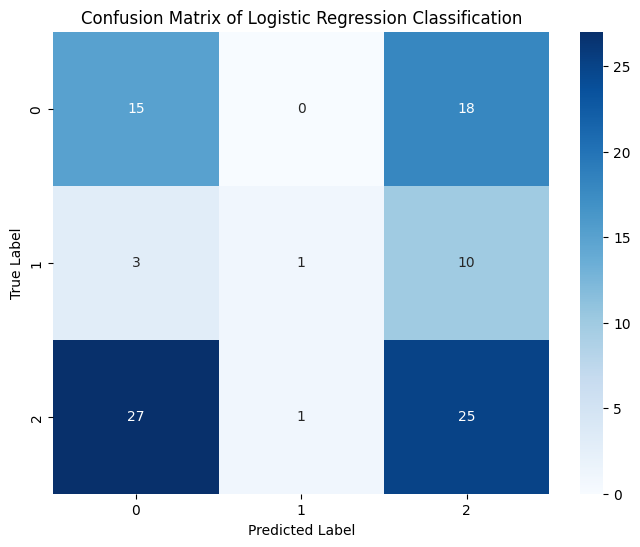

In [47]:
# Example: Confusion Matrix Heatmap
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_LR, annot=True, fmt='d', cmap='Blues', xticklabels=naive_bayes.classes_, yticklabels=naive_bayes.classes_)
plt.title('Confusion Matrix of Logistic Regression Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 9. **Confusion Matrix**

In [48]:
print('Accuration of Naive Bayes Multinomial Classification :', accuracy_NB)
print('Accuration of Logistic Regression Classification :', accuracy_RL)

Accuration of Naive Bayes Multinomial Classification : 0.44
Accuration of Logistic Regression Classification : 0.41
